<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" />
    
    
### <font color='navy'> Modelos no lineales para pronósticos.

**Nombres:** Carlos Emiliano Rodríguez Núñez y Rafael Juarez Badillo Chavez.

**Fecha:** 12 de marzo del 2024.

**Expediente** : 738288 y XXXXXX.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: Link con el enlace del repositorio del creador del proyecto

# Tarea 5: Clase 13

## Enunciado de tarea
>Implementar todas las técnicas vistas en esta clase al siguiente dataset para predecir el precio de las viviendas:

https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

Código de solución estudiante 1

Se intentó ajustar el dataframe para poder utilizar todas las técnicas vistas en clase aunque el ejemplo visto fue una serie de tiempo. También se acomodó el modelo para utilizar prácticamente el ejemplo completo aunque existan modelos univariados o multivariados.

In [2]:
# Código de solución estudiante 1
import numpy as np
import pandas as pd
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Conv1D, MaxPooling1D, concatenate
from keras.utils import plot_model

2024-03-12 18:29:50.851269: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-12 18:29:52.014257: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 18:29:52.014767: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 18:29:52.232135: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-12 18:29:52.680531: I tensorflow/core/platform/cpu_feature_guar

# 1. Modelos CNN univariados


In [2]:
data = pd.read_csv('Housing.csv')


# Reemplazar yes por 1 y no por 0
data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0})
data['basement'] = data['basement'].map({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})
data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})

# One-hot encoding para la variable furnishingstatus
data = pd.get_dummies(data, columns=['furnishingstatus'])

# Mostrar las primeras filas del dataframe para verificar los cambios
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [3]:
data.shape

(545, 15)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 1, 64)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3493 (13.64 KB)
Trainable params: 3493 (13.64 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

<Axes: >

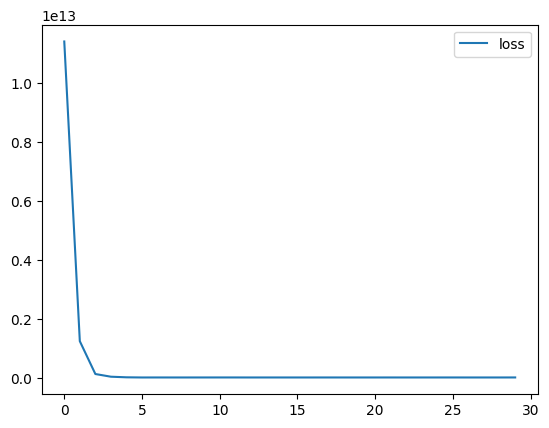

In [4]:
# Función para dividir una secuencia univariada en muestras
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # Encontrar el final de este patrón
        end_ix = i + n_steps

        # Comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break

        # Reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Seleccionar la columna 'price' como nuestra secuencia univariada
raw_seq = data['price'].values

# Elegir un número de pasos de tiempo
n_steps = 3

# Número de características de los datos
n_features = 1  # Para una sola característica (en este caso, el precio)

# Dividir en muestras
X, y = split_univariate_sequence(raw_seq, n_steps)

# Definir el modelo
model_1 = Sequential()
model_1.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
model_1.add(MaxPooling1D())
model_1.add(Flatten())
model_1.add(Dense(50, activation='relu'))
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='mse')
model_1.summary()

# Cambiar la forma de X para que coincida con la entrada esperada del modelo
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Entrenar el modelo
history_1 = model_1.fit(X, y, epochs=30, verbose=False)

# Visualizar la historia del entrenamiento
pd.DataFrame(history_1.history).plot()


In [5]:
# Probamos nuestro modelo
x_input = np.array([13300000, 12250000, 12250000])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model_1.predict(x_input, verbose=0)
yhat

array([[12592572.]], dtype=float32)

# 2. Modelos CNN multivariados
Utilizando 2 features nomás


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 2, 64)             320       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                3250      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3621 (14.14 KB)
Trainable params: 3621 (14.14 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

<Axes: >

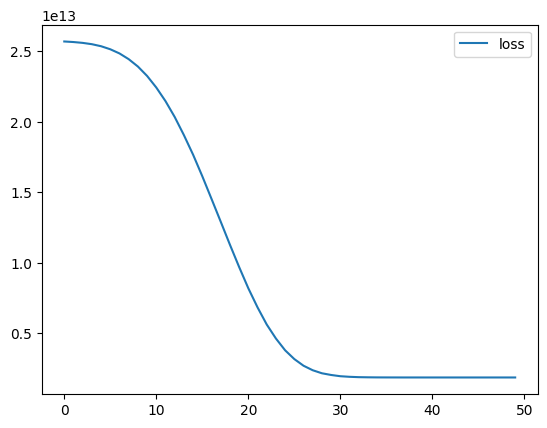

In [6]:
# Función para dividir una secuencia multivariada en muestras
def split_multivariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # Encontrar el final de este patrón
        end_ix = i + n_steps

        # Comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence):
            break

        # Reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Cargar el dataset
# data = pd.read_csv('Housing.csv')

# Seleccionar las columnas relevantes para la secuencia
input_data = data[['area', 'bedrooms', 'price']].values

# Número de pasos de tiempo (en este caso, se utilizarán 3 pasos de tiempo)
n_steps = 3

# Dividir en muestras
X, y = split_multivariate_sequence(input_data, n_steps)

# Número de características de los datos (se excluye la columna de salida 'price')
n_features = X.shape[2]

# Definir el modelo
model_2 = Sequential()
model_2.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
model_2.add(MaxPooling1D())
model_2.add(Flatten())
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(1))
model_2.compile(optimizer='adam', loss='mse')
model_2.summary()

# Entrenar el modelo
history_2 = model_2.fit(X, y, epochs=50, verbose=False)

# Visualizar la historia del entrenamiento
pd.DataFrame(history_2.history).plot()


In [7]:
# Probamos nuestro modelo
x_input = np.array([[7420, 4], [8960, 4], [9960, 3]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model_2.predict(x_input, verbose=0)
yhat

array([[7828269.]], dtype=float32)

# Modelo CNN con múltiples encabezamientos

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 3, 1)]               0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 3, 1)]               0         []                            
                                                                                                  
 conv1d_2 (Conv1D)           (None, 2, 64)                192       ['input_1[0][0]']             
                                                                                                  
 conv1d_3 (Conv1D)           (None, 2, 64)                192       ['input_2[0][0]']             
                                                                                              

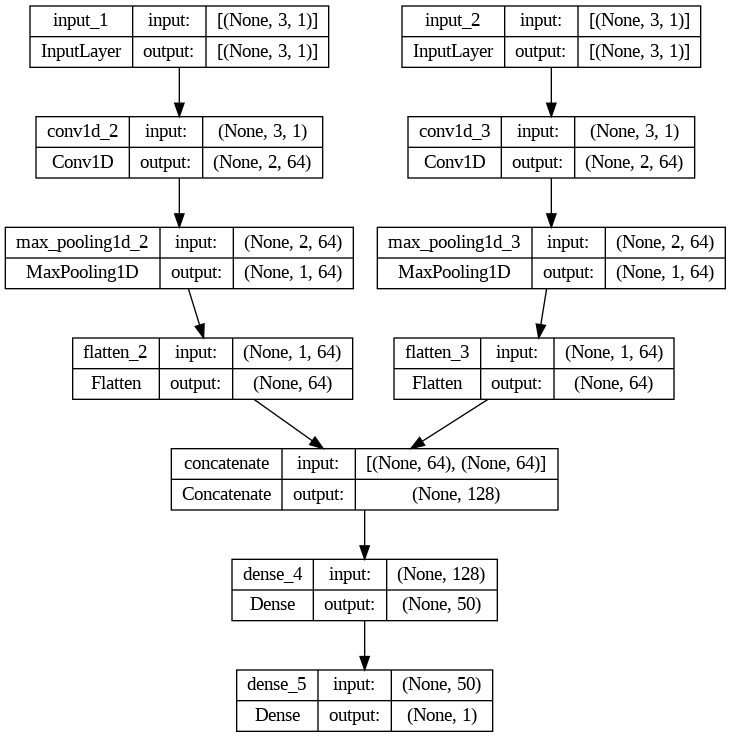

In [8]:
n_features = 1
n_steps = 3

visible1 = Input(shape=(n_steps, n_features))
cnn1 = Conv1D(64, 2, activation='relu')(visible1)
cnn1 = MaxPooling1D()(cnn1)
cnn1 = Flatten()(cnn1)

visible2 = Input(shape=(n_steps, n_features))
cnn2 = Conv1D(64, 2, activation='relu')(visible2)
cnn2 = MaxPooling1D()(cnn2)
cnn2 = Flatten()(cnn2)

merge = concatenate([cnn1, cnn2])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)

model_3 = Model(inputs=[visible1, visible2], outputs=output)

model_3.compile(optimizer='adam', loss='mse')

model_3.summary()

plot_model(model_3, to_file='model.png', show_shapes=True, show_layer_names=True)

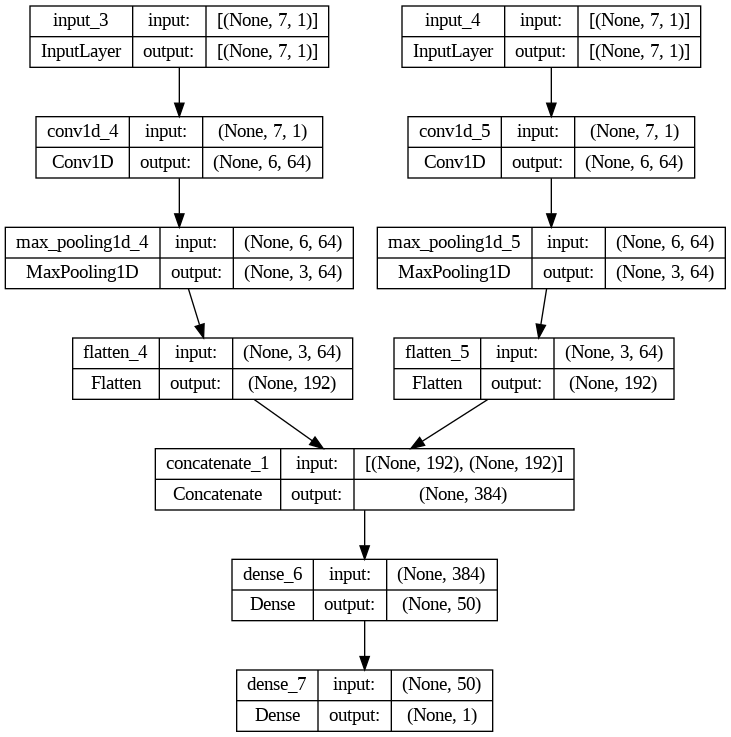

In [9]:
X1 = data.drop('price', axis=1).iloc[:, :7]
X2 = data.drop('price', axis=1).iloc[:, 7:]
y = data['price']

# Reajustamos las entradas para que sean compatibles con el modelo
X1 = X1.values.reshape(X1.shape[0], X1.shape[1], 1)
X2 = X2.values.reshape(X2.shape[0], X2.shape[1], 1)

n_steps = X1.shape[1]
n_features = 1

# Definimos el modelo
visible1 = Input(shape=(n_steps, n_features))
cnn1 = Conv1D(64, 2, activation='relu')(visible1)
cnn1 = MaxPooling1D()(cnn1)
cnn1 = Flatten()(cnn1)

visible2 = Input(shape=(n_steps, n_features))
cnn2 = Conv1D(64, 2, activation='relu')(visible2)
cnn2 = MaxPooling1D()(cnn2)
cnn2 = Flatten()(cnn2)

merge = concatenate([cnn1, cnn2])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)

model_3 = Model(inputs=[visible1, visible2], outputs=output)
plot_model(model_3, to_file='model.png', show_shapes=True, show_layer_names=True)

<Axes: >

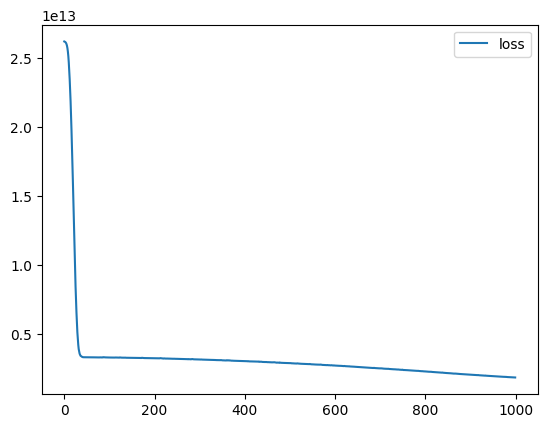

In [10]:
model_3.compile(optimizer='adam', loss='mse')

# Entrenamos el modelo
history = model_3.fit([X1, X2], y, epochs=1000, verbose=0)

# Graficamos el historial de entrenamiento
pd.DataFrame(history.history).plot()

# 2.2 Múltiples series paralelas (multivariable forecasting)

In [11]:
X = data.drop('price', axis=1)
y = data['price']

# Reajustamos las entradas para que sean compatibles con el modelo
X = X.values.reshape(X.shape[0], X.shape[1], 1)
y = y.values.reshape(y.shape[0], 1)

# Definimos el número de pasos y características
n_steps = X.shape[1]
n_features = X.shape[2]

# Definimos el modelo
model_4 = Sequential()
model_4.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
model_4.add(MaxPooling1D())
model_4.add(Flatten())
model_4.add(Dense(50, activation='relu'))
model_4.add(Dense(n_features))
model_4.compile(optimizer='adam', loss='mse')
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 13, 64)            192       
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 6, 64)             0         
 g1D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 384)               0         
                                                                 
 dense_8 (Dense)             (None, 50)                19250     
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 19493 (76.14 KB)
Trainable params: 19493 (76.14 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

<Axes: >

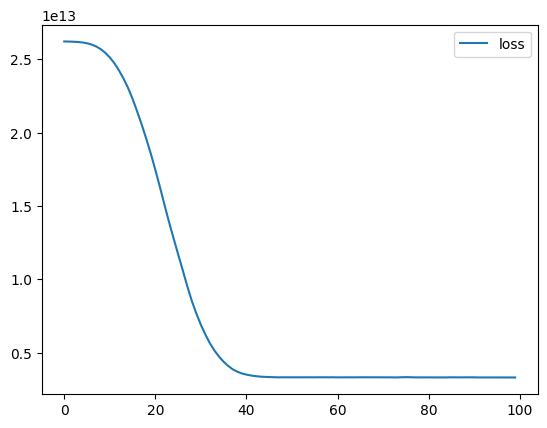

In [12]:
# Entrenamos el modelo
history = model_4.fit(X, y, epochs=100, verbose=0)

# Graficamos el historial de entrenamiento
pd.DataFrame(history.history).plot()

# Multi-output CNN Model

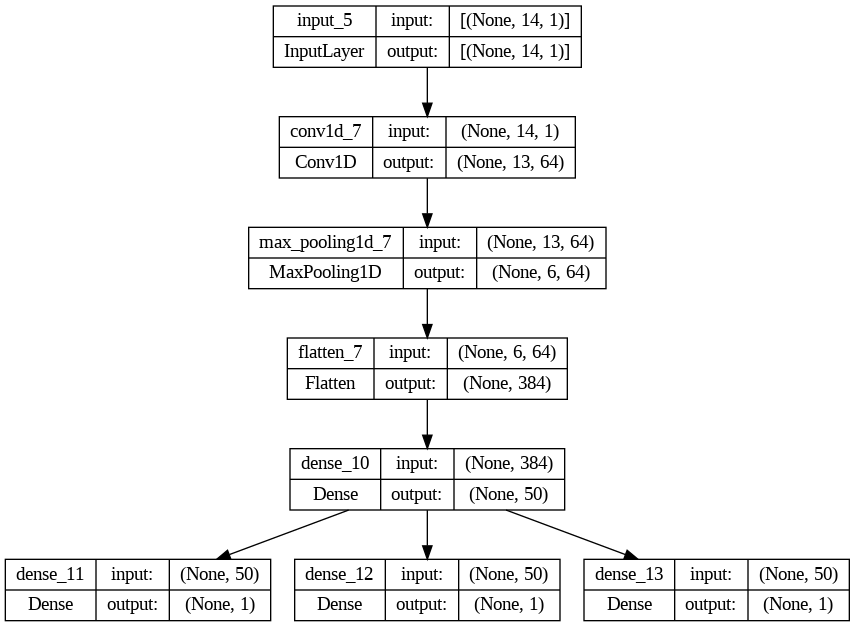

In [13]:

X = data.drop('price', axis=1)
y = data['price']

# Reajustamos las entradas para que sean compatibles con el modelo
X = X.values.reshape(X.shape[0], X.shape[1], 1)

# Definimos el número de pasos y características
n_steps = X.shape[1]
n_features = X.shape[2]

# Definimos el modelo
visible = Input(shape=(n_steps, n_features))
cnn = Conv1D(64, 2, activation='relu')(visible)
cnn = MaxPooling1D()(cnn)
cnn = Flatten()(cnn)
cnn = Dense(50, activation='relu')(cnn)

# Definimos salida 1
output1 = Dense(1)(cnn)
# Definimos salida 2
output2 = Dense(1)(cnn)
# Definimos salida 3
output3 = Dense(1)(cnn)

# Ponemos todo junto
model_5 = Model(inputs=visible, outputs=[output1, output2, output3])
model_5.compile(optimizer='adam', loss='mse')
plot_model(model_5, show_shapes=True, show_layer_names=True)


<Axes: >

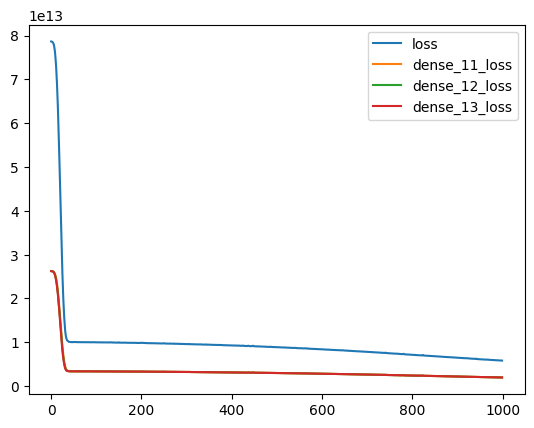

In [14]:
# Entrenamos el modelo
history = model_5.fit(X, [y, y, y], epochs=1000, verbose=0)

# Graficamos el historial de entrenamiento
pd.DataFrame(history.history).plot()

# 3.1 Serie temporal univariada

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 13, 64)            192       
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 6, 64)             0         
 g1D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 384)               0         
                                                                 
 dense_14 (Dense)            (None, 50)                19250     
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 19493 (76.14 KB)
Trainable params: 19493 (76.14 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

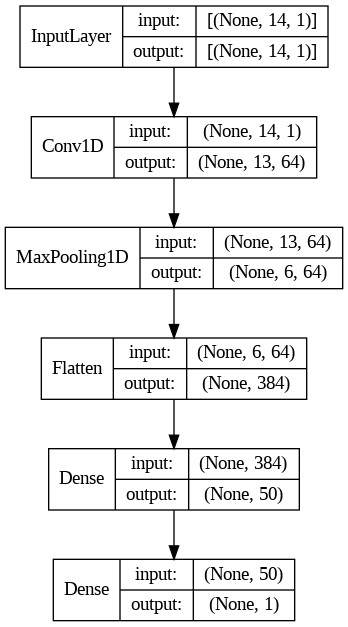

In [15]:
X = data.drop('price', axis=1)
y = data['price']

# Reajustamos las entradas para que sean compatibles con el modelo
X = X.values.reshape(X.shape[0], X.shape[1], 1)

# Definimos el número de pasos y características
n_steps_in, n_steps_out = X.shape[1], 1
n_features = X.shape[2]

# Definimos el modelo
model_6 = Sequential()
model_6.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model_6.add(MaxPooling1D())
model_6.add(Flatten())
model_6.add(Dense(50, activation='relu'))
model_6.add(Dense(n_steps_out))
model_6.compile(optimizer='adam', loss='mse')

model_6.summary()

plot_model(model_6, show_layer_names=False, show_shapes=True,)


<Axes: >

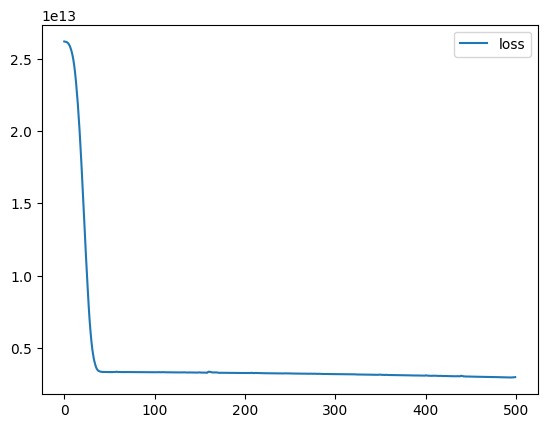

In [16]:
# Entrenamos el modelo
history = model_6.fit(X, y, epochs=500, verbose=0)

# Graficamos el historial de entrenamiento
pd.DataFrame(history.history).plot()

# 3.2 Serie temporal multivariada

In [17]:
X = data.drop('price', axis=1)
y = data['price']

# Reajustamos las entradas para que sean compatibles con el modelo
X = X.values.reshape(X.shape[0], X.shape[1], 1)

# Definimos el número de pasos y características
n_steps_in, n_steps_out = X.shape[1], 1
n_features = X.shape[2]

# Definimos el modelo
model_7 = Sequential()
model_7.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model_7.add(MaxPooling1D())
model_7.add(Flatten())
model_7.add(Dense(50, activation='relu'))
model_7.add(Dense(n_steps_out))
model_7.compile(optimizer='adam', loss='mse')
model_7.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 13, 64)            192       
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 6, 64)             0         
 g1D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 384)               0         
                                                                 
 dense_16 (Dense)            (None, 50)                19250     
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
Total params: 19493 (76.14 KB)
Trainable params: 19493 (76.14 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

<Axes: >

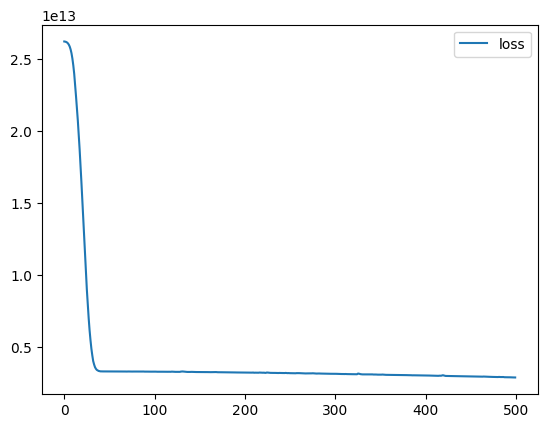

In [18]:
# Entrenamos el modelo
history = model_7.fit(X, y, epochs=500, verbose=0)

# Graficamos el historial de entrenamiento
pd.DataFrame(history.history).plot()

# 3.3 Serie temporal multivariada predicción múltiple de cada entrada

In [19]:
X = data.drop('price', axis=1)
y = data['price']

# Reajustamos las entradas para que sean compatibles con el modelo
X = X.values.reshape(X.shape[0], X.shape[1], 1)

# Definimos el número de pasos y características
n_steps_in, n_steps_out = X.shape[1], 1
n_features = X.shape[2]

# Definimos el modelo
model_8 = Sequential()
model_8.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model_8.add(MaxPooling1D())
model_8.add(Flatten())
model_8.add(Dense(50, activation='relu'))
model_8.add(Dense(n_steps_out))
model_8.compile(optimizer='adam', loss='mse')
model_8.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 13, 64)            192       
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 6, 64)             0         
 ng1D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 384)               0         
                                                                 
 dense_18 (Dense)            (None, 50)                19250     
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                                 
Total params: 19493 (76.14 KB)
Trainable params: 19493 (76.14 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

<Axes: >

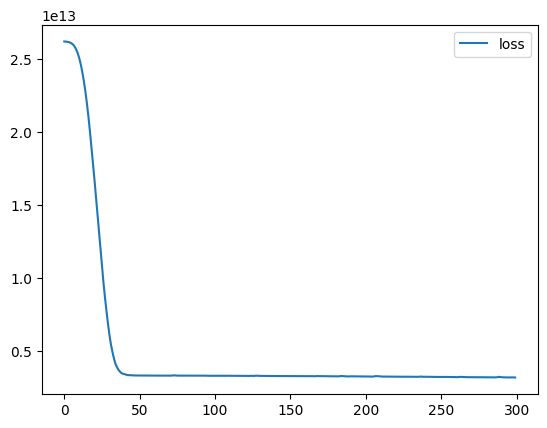

In [20]:
# Entrenamos el modelo
history = model_8.fit(X, y, epochs=300, verbose=0)

# Graficamos el historial de entrenamiento
pd.DataFrame(history.history).plot()

Código de solución estudiante 2 Rafael Juarez Badillo Chavez

In [3]:
# Load the dataset
data = pd.read_csv('Housing.csv')

# Replacing 'yes' with 1 and 'no' with 0
data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0})
data['basement'] = data['basement'].map({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})
data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})

# One-hot encoding for the 'furnishingstatus' variable
data = pd.get_dummies(data, columns=['furnishingstatus'])

# Display the first few rows of the dataframe to verify the changes
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


# 1. Univariate CNN Models

In [6]:
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
# Selecting the 'price' column as our univariate sequence
raw_seq = data['price'].values

# Choosing a number of time steps
n_steps = 3

# Number of features of the data
n_features = 1

# Splitting into samples
X, y = split_univariate_sequence(raw_seq, n_steps)

# Defining the model
model_1 = Sequential()
model_1.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
model_1.add(MaxPooling1D())
model_1.add(Flatten())
model_1.add(Dense(50, activation='relu'))
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='mse')
model_1.summary()


2024-03-12 18:30:41.893854: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:f3:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-12 18:30:43.085038: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:f3:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-12 18:30:43.085161: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:f3:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-12 18:30:43.091696: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:f3:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-12 18:30:43.091801: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 1, 64)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3493 (13.64 KB)
Trainable params: 3493 (13.64 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

# 2. Multivariate CNN Models

In [7]:
# Function to split a multivariate sequence into samples
def split_multivariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence):
            break
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Selecting relevant columns for the sequence
input_data = data[['area', 'bedrooms', 'price']].values

# Splitting into samples
X, y = split_multivariate_sequence(input_data, n_steps)

# Number of features of the data
n_features = X.shape[2]

# Defining the model
model_2 = Sequential()
model_2.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
model_2.add(MaxPooling1D())
model_2.add(Flatten())
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(1))
model_2.compile(optimizer='adam', loss='mse')
model_2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 2, 64)             320       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                3250      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3621 (14.14 KB)
Trainable params: 3621 (14.14 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

# 4.  CNN Model with Multiple Inputs

In [8]:
# Define the inputs
visible1 = Input(shape=(n_steps, n_features))
cnn1 = Conv1D(64, 2, activation='relu')(visible1)
cnn1 = MaxPooling1D()(cnn1)
cnn1 = Flatten()(cnn1)

visible2 = Input(shape=(n_steps, n_features))
cnn2 = Conv1D(64, 2, activation='relu')(visible2)
cnn2 = MaxPooling1D()(cnn2)
cnn2 = Flatten()(cnn2)

# Merge the outputs from two CNN layers
merge = concatenate([cnn1, cnn2])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)

# Create the model
model_3 = Model(inputs=[visible1, visible2], outputs=output)
model_3.compile(optimizer='adam', loss='mse')
model_3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 3, 2)]               0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 3, 2)]               0         []                            
                                                                                                  
 conv1d_2 (Conv1D)           (None, 2, 64)                320       ['input_1[0][0]']             
                                                                                                  
 conv1d_3 (Conv1D)           (None, 2, 64)                320       ['input_2[0][0]']             
                                                                                              

# 5. Multi-Output CNN Model

In [9]:
model_4 = Sequential()
model_4.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
model_4.add(MaxPooling1D())
model_4.add(Flatten())
model_4.add(Dense(50, activation='relu'))
model_4.add(Dense(n_features))  # Output layer with number of features as output units
model_4.compile(optimizer='adam', loss='mse')
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 2, 64)             320       
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 50)                3250      
                                                                 
 dense_7 (Dense)             (None, 2)                 102       
                                                                 
Total params: 3672 (14.34 KB)
Trainable params: 3672 (14.34 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

# 6. Multivariable Forecasting with Parallel Series

In [10]:
# Define the input
visible = Input(shape=(n_steps, n_features))
cnn = Conv1D(64, 2, activation='relu')(visible)
cnn = MaxPooling1D()(cnn)
cnn = Flatten()(cnn)
cnn = Dense(50, activation='relu')(cnn)

# Define outputs
output1 = Dense(1)(cnn)
output2 = Dense(1)(cnn)
output3 = Dense(1)(cnn)

# Combine into a single model
model_5 = Model(inputs=visible, outputs=[output1, output2, output3])
model_5.compile(optimizer='adam', loss='mse')
model_5.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 3, 2)]               0         []                            
                                                                                                  
 conv1d_5 (Conv1D)           (None, 2, 64)                320       ['input_3[0][0]']             
                                                                                                  
 max_pooling1d_5 (MaxPoolin  (None, 1, 64)                0         ['conv1d_5[0][0]']            
 g1D)                                                                                             
                                                                                                  
 flatten_5 (Flatten)         (None, 64)                   0         ['max_pooling1d_5[0][0]'

# 7. Multistep Forecasting with a CNN Model

In [16]:
X = data.drop('price', axis=1)
y = data['price']

X = X.values.reshape(X.shape[0], X.shape[1], 1)

n_steps_in, n_steps_out = X.shape[1], 1
n_features = X.shape[2]

model_6 = Sequential()
model_6.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model_6.add(MaxPooling1D())
model_6.add(Flatten())
model_6.add(Dense(50, activation='relu'))
model_6.add(Dense(n_steps_out))  # Output layer with number of output steps
model_6.compile(optimizer='adam', loss='mse')
model_6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 13, 64)            192       
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 6, 64)             0         
 g1D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 384)               0         
                                                                 
 dense_12 (Dense)            (None, 50)                19250     
                                                                 
 dense_13 (Dense)            (None, 1)                 51        
                                                                 
Total params: 19493 (76.14 KB)
Trainable params: 19493 (76.14 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

# 8. Multivariate Time Series Forecasting

In [17]:
model_7 = Sequential()
model_7.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model_7.add(MaxPooling1D())
model_7.add(Flatten())
model_7.add(Dense(50, activation='relu'))
model_7.add(Dense(n_steps_out))  # Output layer with number of output steps
model_7.compile(optimizer='adam', loss='mse')
model_7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 13, 64)            192       
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 6, 64)             0         
 g1D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 384)               0         
                                                                 
 dense_14 (Dense)            (None, 50)                19250     
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 19493 (76.14 KB)
Trainable params: 19493 (76.14 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

## Execute

In [ ]:
# Execute model_1 (Univariate CNN)
history_1 = model_1.fit(X, y, epochs=50, verbose=0)

# Execute model_2 (Multivariate CNN)
history_2 = model_2.fit(X, y, epochs=50, verbose=0)

# Execute model_3 (CNN with Multiple Inputs)
history_3 = model_3.fit([X1, X2], y, epochs=50, verbose=0)

# Execute model_4 (Multi-Output CNN)
history_4 = model_4.fit(X, y, epochs=50, verbose=0)

# Execute model_5 (Multivariable Forecasting with Parallel Series)
history_5 = model_5.fit(X, [y, y, y], epochs=50, verbose=0)

# Execute model_6 (Multistep Forecasting with a CNN Model)
history_6 = model_6.fit(X, y, epochs=50, verbose=0)

# Execute model_7 (Multivariate Time Series Forecasting)
history_7 = model_7.fit(X, y, epochs=50, verbose=0)

In [ ]:

import matplotlib.pyplot as plt

# Plot history for model_1
plt.plot(history_1.history['loss'], label='model_1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model 1 Training Loss')
plt.legend()
plt.show()

# Plot history for model_2
plt.plot(history_2.history['loss'], label='model_2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model 2 Training Loss')
plt.legend()
plt.show()

# Plot history for model_3
plt.plot(history_3.history['loss'], label='model_3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model 3 Training Loss')
plt.legend()
plt.show()

# Plot history for model_4
plt.plot(history_4.history['loss'], label='model_4')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model 4 Training Loss')
plt.legend()
plt.show()

# Plot history for model_5
plt.plot(history_5.history['loss'], label='model_5')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model 5 Training Loss')
plt.legend()
plt.show()

# Plot history for model_6
plt.plot(history_6.history['loss'], label='model_6')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model 6 Training Loss')
plt.legend()
plt.show()

# Plot history for model_7
plt.plot(history_7.history['loss'], label='model_7')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model 7 Training Loss')
plt.legend()
plt.show()